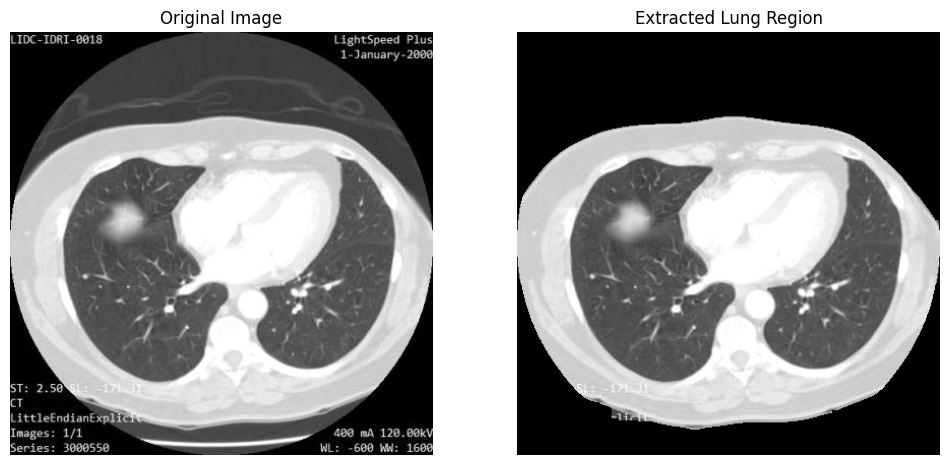

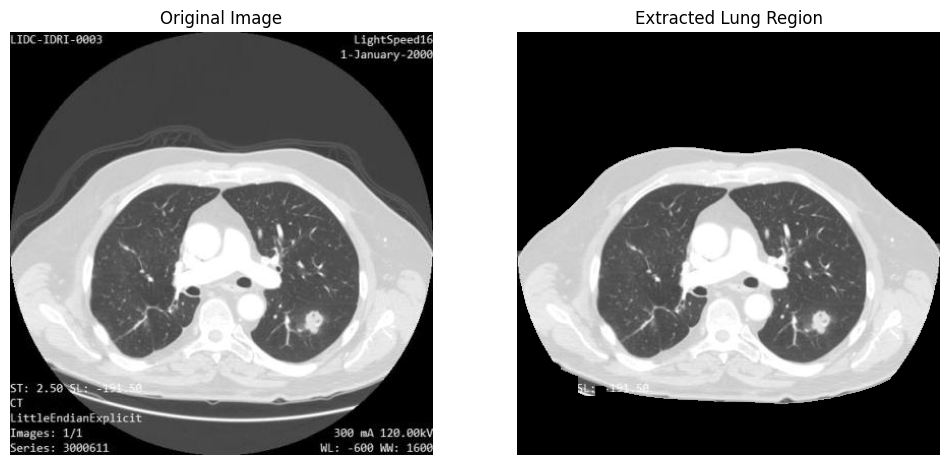

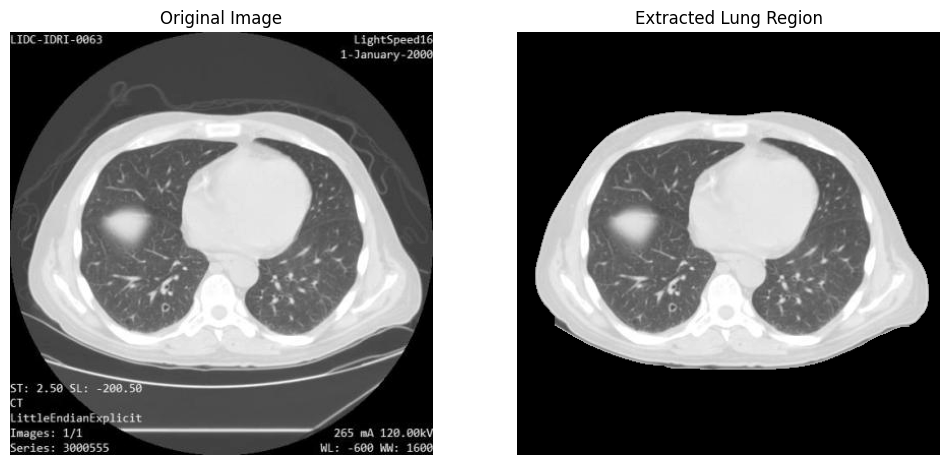

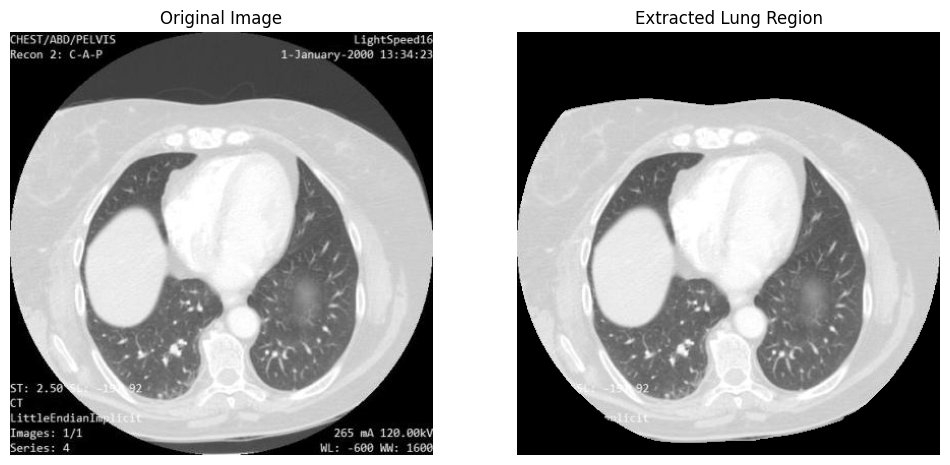

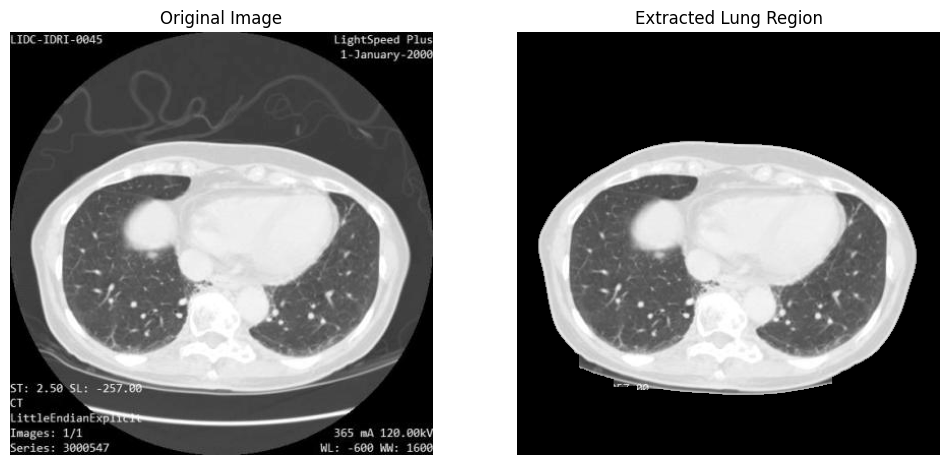

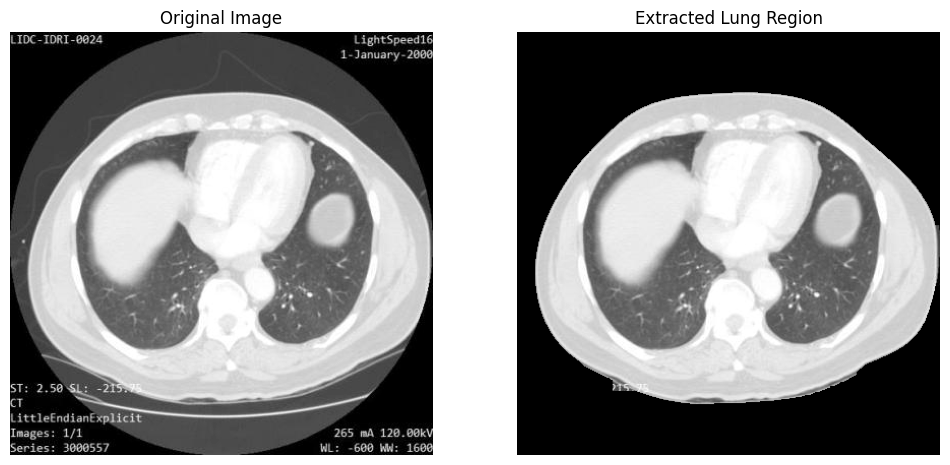

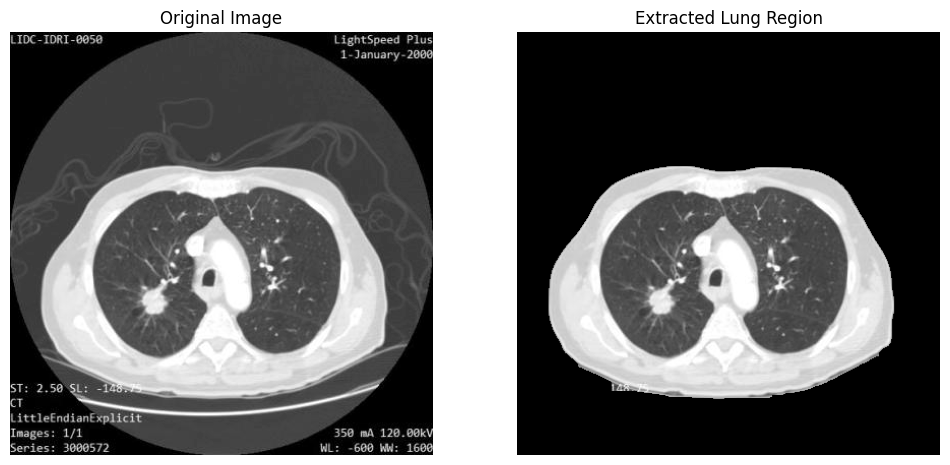

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def extract_lung(image_path):
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred_image = cv2.GaussianBlur(original_image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)
    morph_image = cv2.morphologyEx(morph_image, cv2.MORPH_OPEN, kernel, iterations=2)

    contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    largest_contour = contours[0]

    mask = np.zeros_like(original_image)
    cv2.drawContours(mask, [largest_contour], 0, (255), thickness=cv2.FILLED)

    lung_image = cv2.bitwise_and(original_image, original_image, mask=mask)

    return original_image, lung_image

def process_images_in_folder(folder_path):
    output_folder = os.path.join(folder_path, 'lung_extracted_images')
    os.makedirs(output_folder, exist_ok=True)

    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, file_name)

            original_image, lung_image = extract_lung(image_path)

            output_path = os.path.join(output_folder, f'lung_extracted_{file_name}')
            cv2.imwrite(output_path, lung_image)

            plt.figure(figsize=(12, 6))
            plt.subplot(121)
            plt.imshow(original_image, cmap='gray')
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(122)
            plt.imshow(lung_image, cmap='gray')
            plt.title('Extracted Lung Region')
            plt.axis('off')

            plt.show()

image_folder_path = '/content/CT Image'
process_images_in_folder(image_folder_path)